# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

Prophet can be installed using either command prompt or Anaconda prompt using pip install prophet


In [ ]:
!pip install prophet

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is '^GSPC'

To view
[Ticker Symbls list](https://stockanalysis.com/stocks/)

[*********************100%%**********************]  1 of 1 completed


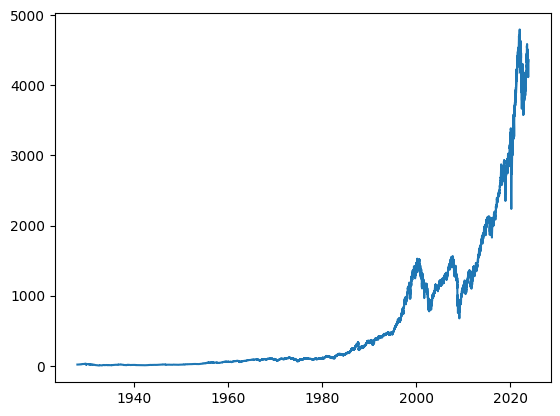

In [2]:

# Python
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

from datetime import timedelta

import matplotlib.pyplot as plt


stock='^GSPC'   # - Ticker Symbol (ID of a stock) for S&P 500 - ^GSPC

start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]

plt.plot(df['Close'])


In [3]:
# Most recent stock prices
df.tail()


Close
Date                   
2023-10-30  4166.819824
2023-10-31  4193.799805
2023-11-01  4237.859863
2023-11-02  4317.779785
2023-11-03  4358.339844

In [4]:
# Most historic Stock Prices
df.head()

Close
Date                 
1927-12-30  17.660000
1928-01-03  17.760000
1928-01-04  17.719999
1928-01-05  17.549999
1928-01-06  17.660000

In [5]:
# Date is the index
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


# Make Stock Predictions

In [6]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkqa4wa0c/8hac13qi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkqa4wa0c/8oarc6eu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62476', 'data', 'file=/tmp/tmpkqa4wa0c/8hac13qi.json', 'init=/tmp/tmpkqa4wa0c/8oarc6eu.json', 'output', 'file=/tmp/tmpkqa4wa0c/prophet_modelbgiqwlf1/prophet_model-20231105180924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
24223 2024-03-29  3861.675474  3587.520919  4127.625855
24224 2024-03-30  3862.845079  3597.183162  4123.273034
24225 2024-03-31  3863.606247  3607.408257  4113.817018
24226 2024-04-01  3863.317069  3590.077834  4122.135542
24227 2024-04-02  3864.757836  3612.557696  4141.747994

In [7]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small


In [8]:
plot_components_plotly(m, forecast)


Let's plot historical stock prices for Chevron Corporation. Ticker symbol is '^CVX'

[*********************100%%**********************]  1 of 1 completed


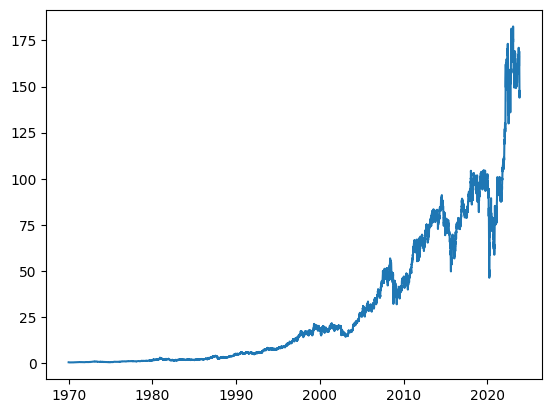

In [10]:
# Python
# import pandas as pd
# from prophet import Prophet

# from pandas_datareader import data as web
# import datetime

# import pandas as pd
# import matplotlib.pyplot as plt

# !pip install yfinance --upgrade --no-cache-dir
# import yfinance as yf

# from datetime import timedelta

# import matplotlib.pyplot as plt


stock='CVX'   # - Ticker Symbol (ID of a stock) for Chevron Corporation


start = '1970-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]


plt.plot(df['Close'])
plt.show()

In [11]:
# Most recent stock prices
df.tail()

Close
Date                  
2023-10-30  146.089996
2023-10-31  145.729996
2023-11-01  143.979996
2023-11-02  148.759995
2023-11-03  147.610001

In [12]:
# Most historic Stock Prices
df.head()

Close
Date                
1970-01-02  0.450624
1970-01-05  0.452780
1970-01-06  0.446312
1970-01-07  0.445234
1970-01-08  0.453859

In [13]:
# Date is the index
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

Make Predictions

In [14]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkqa4wa0c/7sdon6m4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkqa4wa0c/4ir_w71f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96641', 'data', 'file=/tmp/tmpkqa4wa0c/7sdon6m4.json', 'init=/tmp/tmpkqa4wa0c/4ir_w71f.json', 'output', 'file=/tmp/tmpkqa4wa0c/prophet_modelm3t4yuy0/prophet_model-20231105181019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds        yhat  yhat_lower  yhat_upper
13727 2024-03-29  134.798379  122.122452  146.710694
13728 2024-03-30  134.929955  122.783734  147.372844
13729 2024-03-31  134.977008  123.450899  148.019554
13730 2024-04-01  134.818879  122.737326  147.339646
13731 2024-04-02  134.949076  122.396933  147.262473

In [15]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [16]:
plot_components_plotly(m, forecast)

# References
1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV
